In [1]:
#import libraries.
import numpy as np #algebra lineal
import pandas as pd #uso de dataframe
import seaborn as sns #herramienta de visualizacion 

In [2]:
#lectura de datos con panda
data = pd.read_csv("Datasets/fifa21 raw data v2.csv")
data.head()

C:\Users\Haison\AppData\Local\Temp\ipykernel_6888\724215773.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Datasets/fifa21 raw data v2.csv")


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [18]:
#limpiar las columna innecesarias
data.drop(columns = ['photoUrl','playerUrl'], inplace=True)
data.rename(columns={'↓OVA': 'OVA'}, inplace=True)

KeyError: "['photoUrl', 'playerUrl'] not found in axis"

# Exploracion y limpieza del dataset

In [19]:
#explorar los datos
data.info #descripcion de los datos, como el tipo de datos, el tama;o del datasets

<bound method DataFrame.info of            ID               Name                      LongName Nationality  \
0      158023           L. Messi                  Lionel Messi   Argentina   
1       20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro    Portugal   
2      200389           J. Oblak                     Jan Oblak    Slovenia   
3      192985       K. De Bruyne               Kevin De Bruyne     Belgium   
4      190871          Neymar Jr    Neymar da Silva Santos Jr.      Brazil   
...       ...                ...                           ...         ...   
18974  247223             Xia Ao                        Ao Xia    China PR   
18975  258760           B. Hough                     Ben Hough     England   
18976  252757        R. McKinley                Ronan McKinley     England   
18977  243790       Wang Zhen'ao                  Zhen'ao Wang    China PR   
18978  252520          Zhou Xiao                     Xiao Zhou    China PR   

       Age  OVA  POT           

In [20]:
print(f"tama;o del datadets {data.shape}")

tama;o del datadets (18979, 75)


In [21]:
data.head()# imprime las primeras 5 filas del datasets

,ID,Name,LongName,Nationality,Age,OVA,POT,Club,Contract,Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",...,High,Medium,5 ★,91,85,86,94,36,59,595


In [15]:
data.tail() #imprime las ultimas 5 columnas del datasets

,ID,Name,LongName,Nationality,Age,OVA,POT,Club,Contract,Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
18974,247223,Xia Ao,Ao Xia,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,CM,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,England,18,47,65,\n\n\n\nDerry City,2019 ~ 2020,CM,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,57,\n\n\n\nDalian YiFang FC,2020 ~ 2022,RW,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN
18978,252520,Zhou Xiao,Xiao Zhou,China PR,21,47,57,\n\n\n\nDalian YiFang FC,2019 ~ 2023,"CB, LB",...,Medium,Medium,1 ★,62,22,39,42,45,55,NaN


In [24]:
data.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [30]:
def altura_a_instancia(height):
    if isinstance(height,str):
        if height.find('cm') != -1:
            height = height.replace('cm','')
            return int(height)
        elif height.find("'") != -1:
            height = height.split("\'")
            h = int(height[0])*(30.48) + int(height[1].replace('"', ''))*(2.54)
            return int(h)
    else:
        return height

In [31]:
data['Height'] = data['Height'].apply(altura_a_instancia).astype(int) # Everything is converted to 'cm', and all text has been removed
data['Height'].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 162,
       201, 158, 161, 160, 203, 157, 156, 202, 159, 206, 155])

In [34]:
data['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [46]:
def peso_a_entero(weight):
    if isinstance(weight,str):
        if weight.find('kg') != -1:
            weight = weight.replace('kg','')
            return int(weight)
        elif weight.find('lbs') != -1:
            weight = weight.replace('lbs','')
            weight = int(weight) * 0.453592
            return int(weight)
    else:
        return int(weight)

In [47]:
data['Weight'] = data['Weight'].apply(peso_a_entero).astype(int) # Weight is converted to 'kg', and all text is deleted
data['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52])

<AxesSubplot:xlabel='Weight', ylabel='Count'>

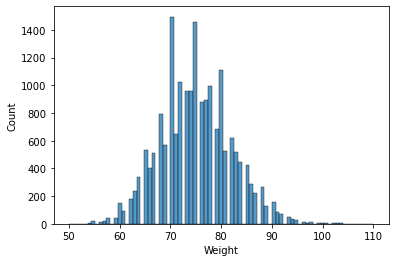

In [41]:
sns.histplot(data=data['Weight']) #visualizar los datos de pesos

<AxesSubplot:xlabel='Height', ylabel='Count'>

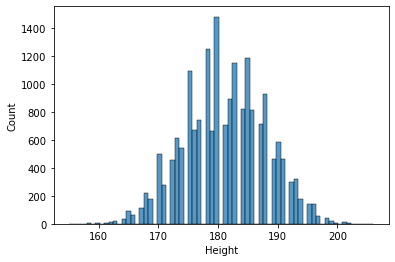

In [44]:
sns.histplot(data=data['Height']) #visualizar los datos de las alturas

In [48]:
#limpiar la columna club
data["Club"]

0               \n\n\n\nFC Barcelona
1                   \n\n\n\nJuventus
2            \n\n\n\nAtlético Madrid
3            \n\n\n\nManchester City
4        \n\n\n\nParis Saint-Germain
                    ...             
18974             \n\n\n\nWuhan Zall
18975        \n\n\n\nOldham Athletic
18976             \n\n\n\nDerry City
18977       \n\n\n\nDalian YiFang FC
18978       \n\n\n\nDalian YiFang FC
Name: Club, Length: 18979, dtype: object

In [51]:
def Club_a_cadena(club):
    if club.find("\n") != -1:
        club = club.replace("\n", " ") 
        return club
    else:
        return club
    

In [53]:
data['Club'] = data['Club'].apply(Club_a_cadena).astype(str)

data['Club'].head()

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
Name: Club, dtype: object

In [54]:
data["Hits"].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [58]:
def clean_hits(hits):
    if isinstance(hits,str):
        if hits.find("K") != -1:
            hits = hits.replace("K"," ")
            return int(float(hits)*1000)
        else:
            return int(hits)
    else:
        return hits
    

In [60]:
data['Hits'] = data['Hits'].apply(clean_hits).fillna(0).astype(int)

data['Hits'].head()

0    771
1    562
2    150
3    207
4    595
Name: Hits, dtype: int32